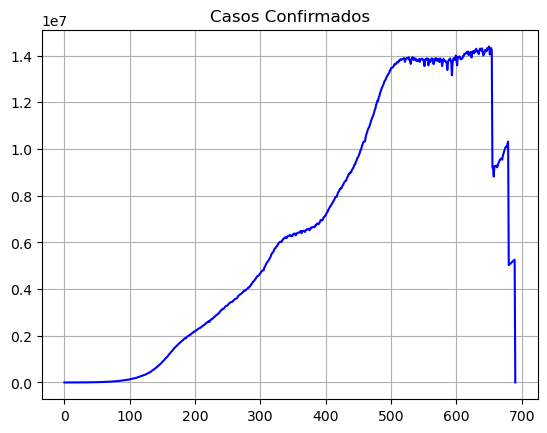

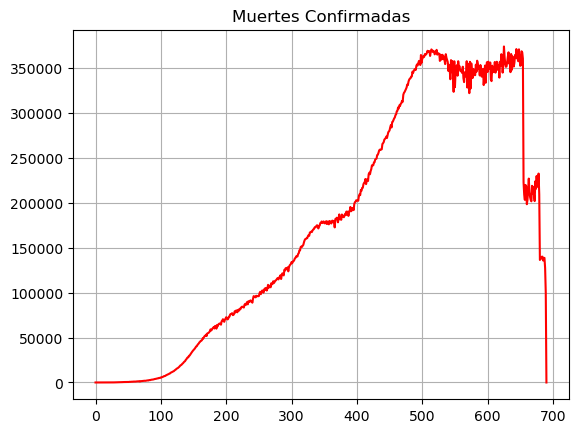

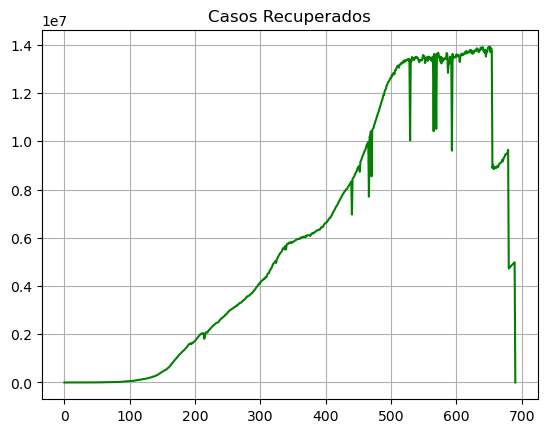

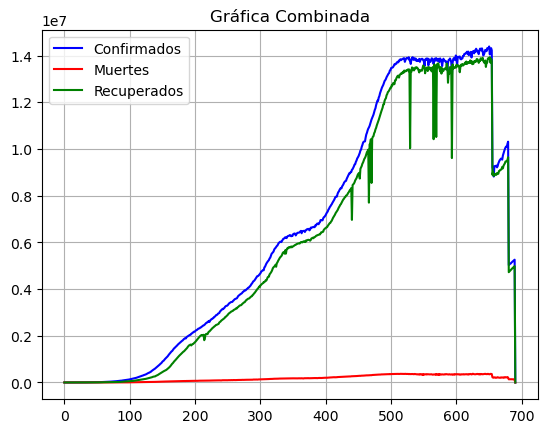

In [1]:
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

conn = sqlite3.connect("covid19.db")
cursor = conn.cursor()

#Se ejecuta la limpieza de datos desde el Query de SQL con la función COALESCE

query = """
SELECT  
    t.date,  
    COALESCE(SUM(t.confirmed), 0),  
    COALESCE(SUM(t.deaths), 0),  
    COALESCE(SUM(t.recovered), 0)  
FROM timeseries t  
WHERE t.id IN (  
    SELECT l.id  
    FROM location l  
    WHERE l.iso_alpha_2 = "CO"  
)  
GROUP BY t.date  
ORDER BY t.date asc;
"""
cursor.execute(query)
data = cursor.fetchall()

fechas = np.array([fila[0] for fila in data])
confirmed = np.array([fila[1] for fila in data])
deaths = np.array([fila[2] for fila in data])
recovered = np.array([fila[3] for fila in data])

for datos, color, titulo in [(confirmed, 'blue', "Casos Confirmados"),
                             (deaths, 'red', "Muertes Confirmadas"),
                             (recovered, 'green', "Casos Recuperados")]:
    plt.plot(datos, color=color)
    plt.title(titulo)
    plt.grid(True)
    plt.show()

plt.plot(confirmed, 'b', label="Confirmados")
plt.plot(deaths, 'r', label="Muertes")
plt.plot(recovered, 'g', label="Recuperados")
plt.title("Gráfica Combinada")
plt.legend()
plt.grid(True)
plt.show()


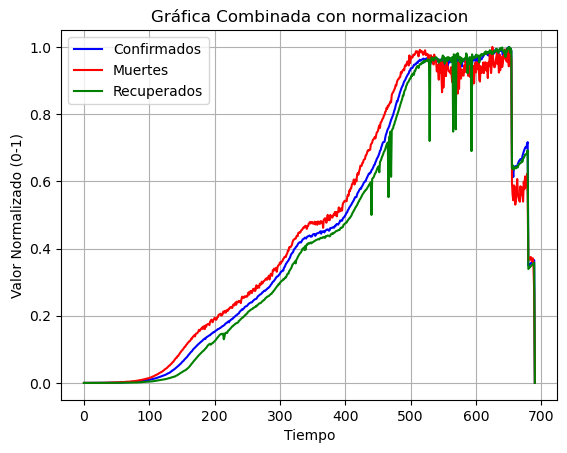

In [5]:
# Normalizar los datos usando Min-Max Scaling
confirmed_norm = (confirmed - np.min(confirmed)) / (np.max(confirmed) - np.min(confirmed))
deaths_norm = (deaths - np.min(deaths)) / (np.max(deaths) - np.min(deaths))
recovered_norm = (recovered - np.min(recovered)) / (np.max(recovered) - np.min(recovered))

# Graficar la versión normalizada
plt.plot(confirmed_norm, 'b', label="Confirmados")
plt.plot(deaths_norm, 'r', label="Muertes")
plt.plot(recovered_norm, 'g', label="Recuperados")
plt.title("Gráfica Combinada con normalizacion")
plt.xlabel("Tiempo")
plt.ylabel("Valor Normalizado (0-1)")
plt.legend()
plt.grid(True)
plt.show()
